# Introducción al aprendizaje automatizado - TP 0
## Autora: Aldana Zarate

Como los apartados a) y b) son idénticos solo que difieren en el centro de las distribuciones y sus desviaciones estándar, primero crearemos una función auxiliar que además de los parámetros pedidos tome adicionalmente los mencionados para luego usarla adecuadamente.


In [1]:
import pandas as pd
import numpy as np
import math

def generate_dataframe(center1, center2, std_dev, d, n):
    cov_matrix = np.diag([std_dev ** 2] * d)
    ndarray1 = np.random.multivariate_normal(center1, cov_matrix, size = n // 2)
    ndarray2 = np.random.multivariate_normal(center2, cov_matrix, size = math.ceil(n / 2))
    
    ndarray = np.concatenate((ndarray1, ndarray2))
    
    dataframe = pd.DataFrame(data = ndarray)
    
    dataframe['Clase'] = np.append([1] * (n // 2), [-1] * (math.ceil(n / 2)))
    return dataframe
    

### Apartado a)

In [2]:
def generate_dataframe_ej_a(d, n, c):
    return generate_dataframe([1] * d, [-1] * d, c * math.sqrt(d), d, n)


### Apartado b)

In [3]:
def generate_dataframe_ej_b(d, n, c):
    return generate_dataframe(np.append([1],[0] * (d-1)), np.append([-1], [0] * (d-1)), c, d, n)
    

### Verificación de los problemas a) y b)

<AxesSubplot:xlabel='0', ylabel='1'>

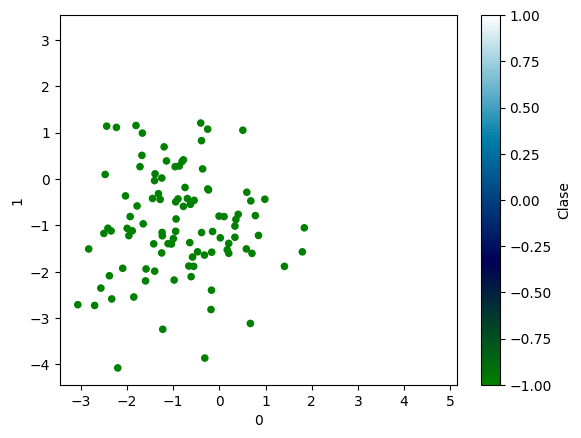

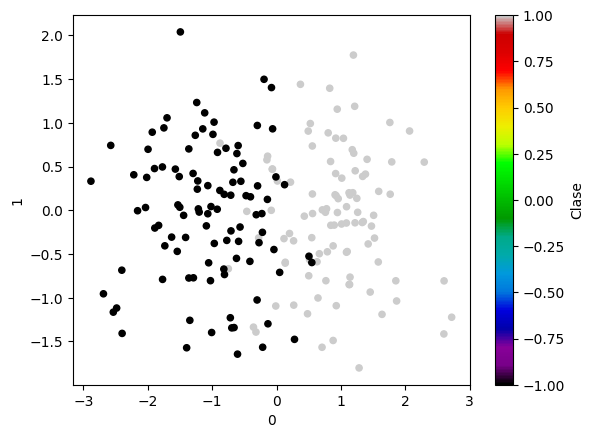

In [4]:
import matplotlib.pyplot as plt

df_a = generate_dataframe_ej_a(2, 200, 0.75)
df_b = generate_dataframe_ej_b(2, 200, 0.75)

df_a.plot(x=0, y=1, kind='scatter', c='Clase', colormap='ocean')
df_b.plot(x=0, y=1, kind='scatter', c='Clase', colormap='nipy_spectral')